In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import imutils as im

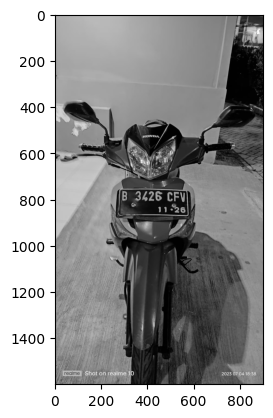

In [2]:
img = cv2.imread ('Image/platMotor.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

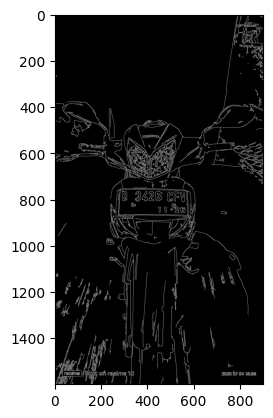

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = im.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [5]:
lokasi = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        lokasi = approx
        break

In [6]:
mask = np.zeros(gray.shape, np.uint8)
gambarBaru = cv2.drawContours(mask, [lokasi], 0,255, -1)
gambarBaru = cv2.bitwise_and(img, img, mask = mask)

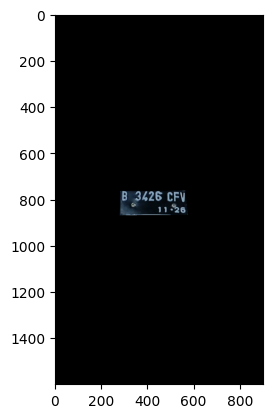

In [7]:
plt.imshow(cv2.cvtColor(gambarBaru, cv2.COLOR_BGR2RGB))


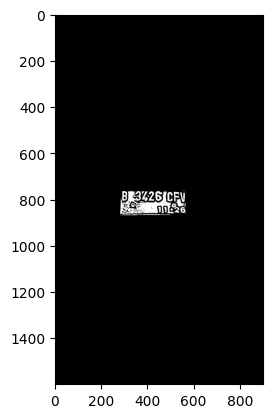

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
potonganGambar = cv2.drawContours(mask, [lokasi], 0, 255, -1)
thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
binary_image = cv2.bitwise_and(potonganGambar, potonganGambar, mask=thresholded)
plt.imshow(binary_image, cmap='gray')

In [9]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
potonganGambar = gray[x1:x2+1, y1:y2+1]

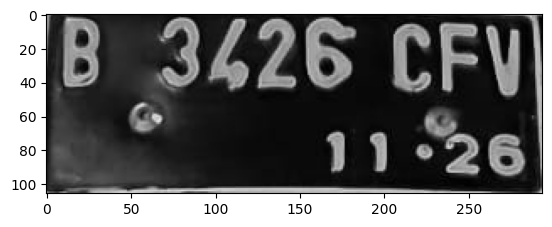

In [10]:
plt.imshow(cv2.cvtColor(potonganGambar, cv2.COLOR_BGR2RGB))

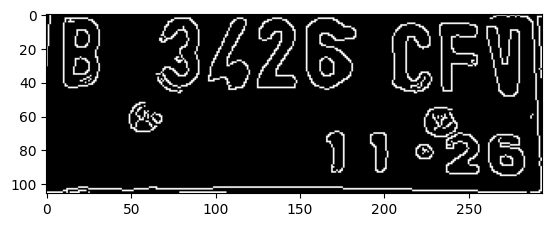

In [11]:
bfilter = cv2.bilateralFilter(potonganGambar, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
